## All header files

In [1]:
import cv2
import numpy as np
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

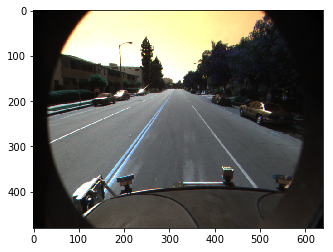

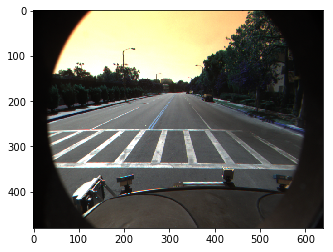

In [2]:
plt.figure()
roadimage1 = cv2.imread("road1.png")
plt.imshow(roadimage1)
plt.figure()
roadimage2 = cv2.imread("road2.png")
plt.imshow(roadimage2)

### Use of image processing techniques, for lane detection

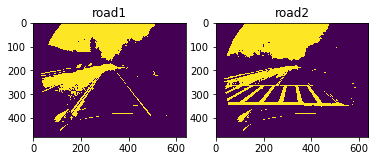

In [3]:
roadimage1 = cv2.imread("road1.png")
roadimage2 = cv2.imread("road2.png")
img1 = roadimage1
img2 = roadimage2
imgray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
ret1,thresh1 = cv2.threshold(imgray1,127,255,0)

imgray2 = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret2,thresh2 = cv2.threshold(imgray2,127,255,0)


fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("road1")
plt.imshow(thresh1)
a=fig.add_subplot(1,2,2)
a.set_title("road2")
plt.imshow(thresh2)

In [4]:
contours,hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1, contours, -1, (0,255,0), 3)

contours,hierarchy = cv2.findContours(thresh2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contours, -1, (0,255,0), 3)

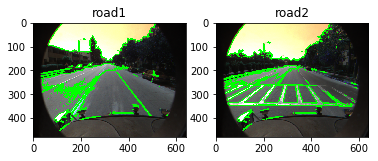

In [5]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("road1")
plt.imshow(img1)
a=fig.add_subplot(1,2,2)
a.set_title("road2")
plt.imshow(img2)

##### Lanes are detected but also other parts are highlighted. Therefore other methods are applied.


#### Canny Edge Detector
1. First argument is image.
2. Second and third argument is Hysteresis thresholding maxValue and minValue.
Change of these max and min will decide that lines are edges are not.
Below min intensity gradient are not edges.
Above max intensity gradient are edges.
Between min and max pixels can be edge and non-edge.
If connected to edge(above max), they are edge. Otherwise discarded.
Tried with 3 combinations, third combination yields better.

http://docs.opencv.org/trunk/da/d22/tutorial_py_canny.html

In [3]:
edges1 = cv2.Canny(roadimage1,10,20,apertureSize = 3)
edges2 = cv2.Canny(roadimage1,10,500,apertureSize = 3)
edges3 = cv2.Canny(roadimage1,100,200,apertureSize = 5)
edges4 = cv2.Canny(roadimage1,100,200,apertureSize = 3)

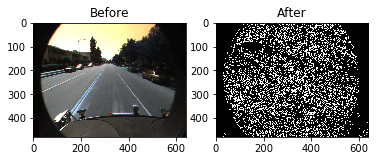

In [4]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("Before")
plt.imshow(roadimage1,cmap='gray')
a=fig.add_subplot(1,2,2)
a.set_title("After")
plt.imshow(edges1,cmap='gray')

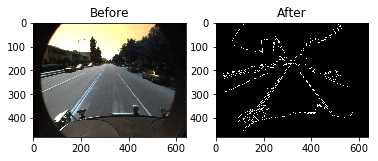

In [5]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("Before")
plt.imshow(roadimage1,cmap='gray')
a=fig.add_subplot(1,2,2)
a.set_title("After")
plt.imshow(edges2,cmap='gray')

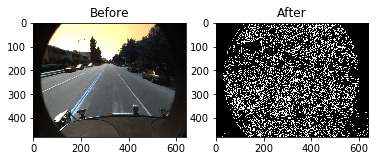

In [6]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("Before")
plt.imshow(roadimage1,cmap='gray')
a=fig.add_subplot(1,2,2)
a.set_title("After")
plt.imshow(edges3,cmap='gray')

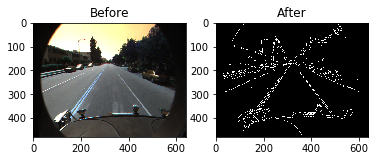

In [7]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("Before")
plt.imshow(roadimage1,cmap='gray')
a=fig.add_subplot(1,2,2)
a.set_title("After")
plt.imshow(edges4,cmap='gray')

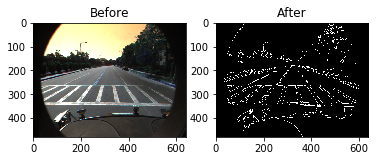

In [8]:
edges3 = cv2.Canny(roadimage2,100,200,apertureSize = 3)
fig = plt.figure()
a=fig.add_subplot(1,2,1)
a.set_title("Before")
plt.imshow(roadimage2,cmap='gray')
a=fig.add_subplot(1,2,2)
a.set_title("After")
plt.imshow(edges3,cmap='gray')

## Hough Transform
    
    http://docs.opencv.org/3.0-beta/_images/houghlines1.svg
    
    It returns rho(distance) and theta(angle) of lines detected.
    First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. 
    Second and third parameters are \rho and \theta accuracies respectively. 
    Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. 
    Number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

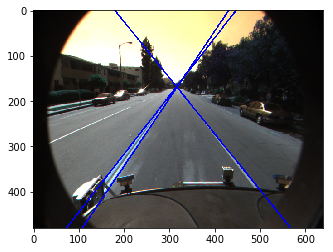

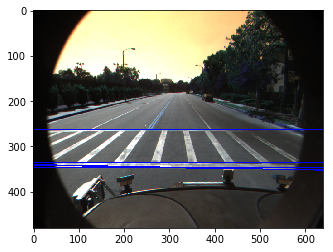

In [10]:
roadimage1 = cv2.imread('road1.png')
lines = cv2.HoughLines(edges4,1,np.pi/180,205)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(roadimage1,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure()
plt.imshow(roadimage1,cmap='gray')

roadimage2 = cv2.imread('road2.png')
lines = cv2.HoughLines(edges3,1,np.pi/180,190)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(roadimage2,(x1,y1),(x2,y2),(0,0,255),2)
plt.figure()
plt.imshow(roadimage2,cmap='gray')


##### Use of HT on both the images. 
1. The fourth parameter, number of votes are varied.
2. For road1.png,205 votes is good. 
3. For road2.png,190 votes is good.

Tried every other possible votes to generate single lines.